<center> <h1> Analysis of the S&P 500 time series </h1> </center>

# “It is a capital mistake to theorize before one has data.” — Sherlock Holmes#

We want to immediately jump in and look at some real time series data in Python.  An obvious place to start is to look at U.S. equity market returns.

I've sent you a file called **^GSPC.csv**.  **^GSPC** is Yahoo's ticker symbol for the S&P 500 index, and the **.csv** extension means it is a **comma-separated values** file.  The first line consists of column names separated by commas.  Each subsequent line in the file consists of several numerical values (also separated by commas).  Feel free to inspect the contents of this file directly with a text editor or the `more` command in your terminal window.

To work with this data in Python, it is helpful to use a Python library called ***pandas***, which is a powerful data analysis package in Python that was originally written for financial applications.

If you haven't already installed the *pandas* library on your computer, go to a Terminal window on the Mac (or Command Prompt in Windows) and type `conda install pandas` (or alternatively `pip install pandas`).

In [1]:
# Let's load the pandas library.
import pandas

In [2]:
# Let's read a .csv file and write the data to an object called "df".
df = pandas.read_csv("Data/^GSPC.csv")

In [3]:
# What type of object is "df"?
type(df)

pandas.core.frame.DataFrame

`df` is a *pandas* ***DataFrame***, which is a 2-dimensional table.  It is the basic data structure in *pandas* and allows SQL-like queries.

In [4]:
# Let's inspect the beginning of our DataFrame.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


We see that we have seven named columns, including the first *Date* column, and each row is indexed by an integer (starting with zero).  We also notice that our first row starts on January 3, 1950, and there are rows for each business day thereafter (but not every calendar day).

In [5]:
# Let's inspect the end of our DataFrame,
# to see when our data stops.
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17528,2019-08-30,2937.090088,2940.429932,2913.320068,2926.459961,2926.459961,3008450000
17529,2019-09-03,2909.010010,2914.389893,2891.850098,2906.270020,2906.270020,3426790000
17530,2019-09-04,2924.669922,2938.840088,2921.860107,2937.780029,2937.780029,3163260000
17531,2019-09-05,2960.600098,2985.860107,2960.600098,2976.000000,2976.000000,3890700000
17532,2019-09-06,2980.330078,2985.030029,2972.510010,2978.709961,2978.709961,3208280000


So our data stops at September 6, 2019 and we have 17,533 rows of data (including the 0th row).

We are primary interested in the "Close" prices of the index, so let's create a data object with just that column.

In [6]:
ts = df["Close"]

In [7]:
type(ts)

pandas.core.series.Series

In [8]:
ts.head()

0    16.66
1    16.85
2    16.93
3    16.98
4    17.08
Name: Close, dtype: float64

We see that we have created a 1-dimensional object of numerical values, called a *pandas* ***Series***.  We have created our first **time series**!

# Plotting our way forward.

Absolutely the first step to analyzing any time series is to plot it!  Plotting the data can show important properties such as trends, seasonality and cycles, outliers and discontinuities.

We'll use a library called ***matplotlib*** to help us plot the data.

In [9]:
import matplotlib

In [10]:
# This command will tell Jupyter to display our
# plots within our notebook.
%matplotlib inline

<AxesSubplot:>

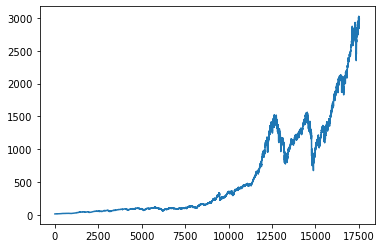

In [11]:
ts.plot()

I am not overly fond of having the x-axis intersect the y-axis below 0.  It gives a misleading impression of the scale of the data during the earlier time periods.  Let's fix this by setting the range of the y-axis manually.

matplotlib.axes._subplots.AxesSubplot

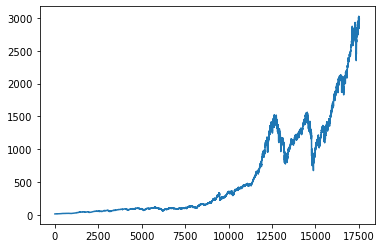

In [12]:
type(ts.plot())

(0.0, 3000.0)

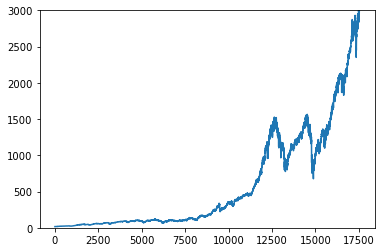

In [13]:
ts.plot().set_ylim(0,3000)

Much better!

But perhaps you wish only to set the lower bound of the y-axis, but allow the upper bound to be set automatically.

(0.0, 3176.32011235)

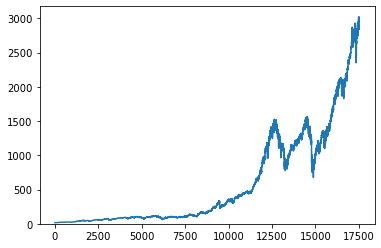

In [14]:
ts.plot().set_ylim(0,None)

From a purely mathematical point of view, this representation of the data seems sufficient, but to get a better sense of the actual **context** of the data, what are we missing?

In [15]:
# Let's go back to our .csv file and read it in
# again, but this time using the first (0th)
# column of dates as an *index* for our DataFrame.
df = pandas.read_csv("data/^GSPC.csv", index_col = 0)

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [17]:
ts = df["Close"]

In [18]:
ts.head()

Date
1950-01-03    16.66
1950-01-04    16.85
1950-01-05    16.93
1950-01-06    16.98
1950-01-09    17.08
Name: Close, dtype: float64

(0.0, 3176.32011235)

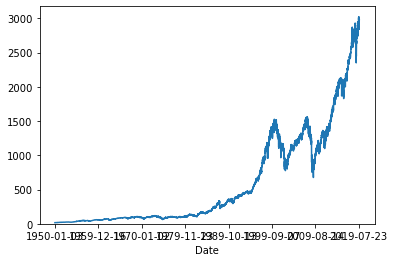

In [19]:
ts.plot().set_ylim(0,None)

Our x-axis labels don't look too good!  What has gone wrong?  Let's look more carefully at our index.

In [20]:
# The .index method retrieve the index of our
# Series or DataFrame.
df.index

Index(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06', '1950-01-09',
       '1950-01-10', '1950-01-11', '1950-01-12', '1950-01-13', '1950-01-16',
       ...
       '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
       '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06'],
      dtype='object', name='Date', length=17533)

In [21]:
# Let's look at the first (0th) index in our list.
df.index[0]

'1950-01-03'

In [22]:
#  Is this really a date?  Or just a string that
# looks like a date?
type(df.index[0])

str

Aha!  The problem is that we read in the dates as just strings rather than true dates.  Let's go back and try to read in our dates as dates rather than strings.

In [24]:
df = pandas.read_csv("data/^GSPC.csv", index_col = 0, parse_dates = True)

In [25]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

*pandas* ***Timestamp*** actually keeps track of both date and time of day.

In [26]:
ts = df["Close"]

(0.0, 3176.32011235)

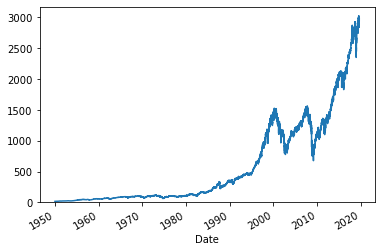

In [27]:
ts.plot().set_ylim(0,None)

This plot isn't perfect but still much improved!  The dates can provide us with essential context.

# "Be transformed." — Romans 12:2 #

Notice that the plot is increasing in time, and the rate of increase is also increasing, suggesting a polynomial or perhaps exponential growth **trend**.  The magnitude of up and down changes seems to be increasing in time as well (i.e. increasing variance), perhaps proportional to the level.

This suggests the possibile usefulness of a model where the value of the next period depends **multiplicatively** on the previous period, such as
$$s_t = s_{t-1} \cdot (1 + r_t) = s_0 \cdot \prod_{i=1}^{i=t} (1+{r_t})$$
where $r_t$ is the simple daily price return, and $s_0$ is the initial level of the S&P 500 index.

It is often convenient to **transform** our time series data.  When we encounter a possible exponential growth trend and multiplicative model of generating the time series data, we often benefit from performing a **logarithmic** transformation
$$x_t = \log s_t$$
which may help stabilize the variance.

In [28]:
# First we import the "numpy" scientific computing
# library.
import numpy

In [29]:
# Now we create a new Series which is the natural
# logarithm of the original Series.
logts = numpy.log(ts)

<AxesSubplot:xlabel='Date'>

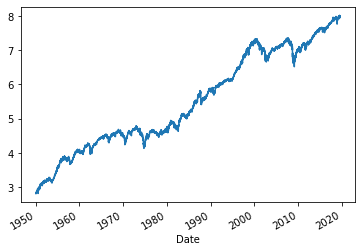

In [30]:
logts.plot()

This transformed series appears to be an easier series to analyze than our original data.  Just by "eyeballing" the data, we appear to have a roughly **linear growth trend** plus some fluctuation about the trend, and it appears that the **variance** is much more stable.

A ***stochastic process*** is a family of random variables $X_t$ indexed by a set of numbers $t$, where $t$ usually represents time.  In time series analysis, we usually only consider **discrete** values of $t$ (such as $t= 0, 1, 2, \dots$), but it is also possible to consider continuous values of $t$ as well.

Now let's suppose we have *observed* time series data
$$x_0, x_1, x_2, \dots$$
where the $x_t$ are the actual numerical values (not random variables).
We wish to propose as a ***model*** for the time series a discrete stochastic process
$$X_0, X_1, X_2, \dots$$
where the $X_t$ are random variables, such that the random variables $X_t$ could have plausibly generated the observed data $x_t$.

In practice, when someone says "***time series***", they might be referring to either the ***observed*** time series data or the ***time series model*** of random variables.  You will have use  context to distinguish between the two usages.

The simplest model of a series with a trend is the ***linear trend plus noise*** model
$$X_t = a + bt +\epsilon_t$$
where slope $b$ is the trend and $\epsilon_t$ is a random error with zero mean.  We might also refer to such a trend as a ***deterministic linear trend*** because the trend has no random component.  Such a trend is also called a ***global linear trend*** because the trend is modelled to exist for all time.

However, a global trend is often an unrealistic assumption unless we have a special reason to assume that a trend will persist for all time, and for this reason ***local*** or ***stochastic*** trend models are often preferred.

A more common approach is to model the time series as a ***random walk with drift***,
$$X_t = X_{t-1} + Z_t$$
where the $Z_t$ are independently and identically distributed (i.i.d.) random variables, with mean $\mu = \mathbb{E}[Z_t]$.  The $Z_t$'s form a ***purely random process***. We can also rewrite this model as
$$X_t = X_{t-1} + \mu + \epsilon_t,$$
where the $\epsilon_t$ has mean 0.  Such a purely random process with zero mean is frequently referred to as ***white noise*** (because in the frequency domain its spectrum has equal intensity at all frequencies, analogous to white light).

For our log-transformed S&P 500 data, should we prefer a linear trend plus noise model?  Or a random walk model?  For economic and especially financial data, the **random walk model usually provides better out-of-sample forecasts** than global deterministic trend models (see page 27 in the text and the reference to Franses and Kleibergen (1996)).

# What's the difference? #

When dealing with random walks, it is often useful to rewrite the model as:
$$X_t - X_{t-1} = \mu + \epsilon_t.$$
Taking the difference between the current value $X_t$ and the previous value $X_{t_1}$ is called ***differencing*** and is so common that we have a special notation for this:
$$\nabla X_t = X_t - X_{t-1}.$$

Let's take the difference of our S&P 500 data,
$$y_t = \nabla x_t = x_t - x_{t-1} = \log s_t - \log s_{t-1} = \log \left(\frac {s_t}{s_{t-1}} \right).$$
The $y_t = \log(s_t / s_{t-1})$ here are often called ***log returns*** of the price data, and for small $y_t$ they are approximately equal to the simple price returns $r_t = (s_t-s_{t-1})/ s_{t-1}$.

In [31]:
# Let's take differences of our log price data.
logdiff = logts.diff()

In [32]:
# Let's inspect the beginning of our differenced
# series.
logdiff.head()

Date
1950-01-03         NaN
1950-01-04    0.011340
1950-01-05    0.004737
1950-01-06    0.002949
1950-01-09    0.005872
Name: Close, dtype: float64

Notice that the first date has a value if ***NaN***, which stands for "not a number."

In [33]:
# Let's get rid of that initial NaN.
# It may screw us up later.
logdiff = logdiff.dropna()
logdiff.head()

Date
1950-01-04    0.011340
1950-01-05    0.004737
1950-01-06    0.002949
1950-01-09    0.005872
1950-01-10   -0.002932
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

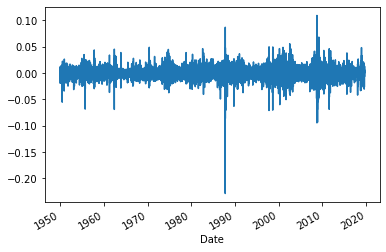

In [34]:
logdiff.plot()

What to make of this time series plot?  By taking differences, we have eliminated the trend.  Is what remains a purely random process?  It does seem fairly random, but there seems to be "quiet periods" and "noisy periods" in the data.

Where to go from here?  It probably makes sense calculate some summary descriptive statistics.

In [35]:
# How many observations do we have
# (excluding the NaN value)?
logdiff.count()

17532

In [36]:
# Let's take the sample mean of the log returns.
logdiff.mean()

0.00029581536333787617

In [37]:
# Let's convert this mean daily return to a mean
#annual return, by multiplying by the number of
# trading days per year, which is usally about 252.
logdiff.mean() * 252

0.0745454715611448

This is telling us that the S&P 500 index has returned an average of **7.45%** per year (continuously compounded) since 1950.  But note that this return is only the ***price return*** because it has excluded dividends, and this is a ***nominal return*** in the sense that we have not adjusted for inflation to calculate a ***real return***.

In [38]:
# Next we calculate the sample standard deviation
# of the daily log returns.
logdiff.std()

0.009653599086165907

In [39]:
# Let's convert this daily standard deviation to an
# annual standard deviation (usually called the
# "volatility") by multiplying by the square root
# of 252.
logdiff.std() * 252**0.5

0.15324613463229228

So the annual realized ***volatility*** of the S&P 500 index since 1950 is **15.32%**, which is approximate twice the mean return.

In [40]:
# What about the median daily return?
logdiff.median()

0.0004726493684277244

The mean daily return is substantially below the **median** daily return!  This suggests that the return data exhibits ***negative skew***, i.e. large negative returns occur more frequently than large positive returns.

Let's now plot a ***histogram*** of our return data to see the general shape of the distribution.

(-0.05, 0.05)

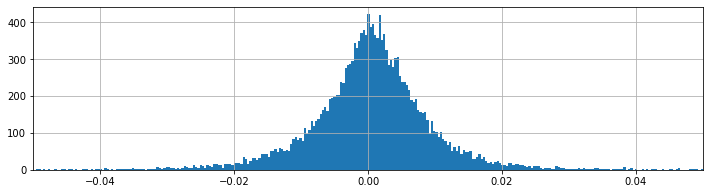

In [41]:
logdiff.hist(bins=1000, figsize=(12,3)).set_xlim((-0.05,0.05))

This is a **bell-shaped distribution** that looks a lot like a normal distribution, except for the fact that there are a many of observations at least four standard deviations ("4 sigma") away  from the mean, which should only happen about once every 16,000 observations if this were truly normally distributed.  In other words, we should only see one or two such outliers (among our 17,532 observations), not the large number of outliers that we see.  So this distribution has "***fatter tails***", or greater ***kurtosis*** than that of a normal distribution, in addition to the negative skew that we mentioned earlier.

# Let's take a moment.#

To get a better picture of our distribution of returns, let's consider the ***moments*** of a random variable.  The ***$n$th moment*** $M_n$ of a random variable $X$ is the expectation of $X^n$:
$$M_n = \mathbb{E}[X^n].$$
For example, the first moment $M_1$ is the mean of $X$.

We can also consider the ***$n$th central moment of $X$***, which is defined to be
$$\mu_n = \mathbb{E}[(X - \mu)^n]$$
where $\mu = \mathbb{E}[X]$ is the mean of $X$.

For example, the second central moment $\mu_2 = \sigma^2$ is the variance of $X$.

We also have the notion of the ***$n$th standardized moment***:
$$\tilde{\mu}_n = \mathbb{E}\left[\left(\frac{X - \mu}{\sigma}\right)^n\right]$$
where $\mu$ is the mean of $X$ and $\sigma$ is the standard deviation of $X$.

The third standardized moment $\tilde{\mu}_3$ is called the ***Pearson moment coefficient of skewness*** or just the "***skewness***".  Every **symmetric** distribution will have **zero skewness**.

The fourth standardized moment $\tilde{\mu}_4$ is called the ***Pearson moment coefficient of kurtosis*** or just the "***kurtosis***".  For example, the normal distribution has a coefficient of kurtosis of $3$, which leads to the definition of ***Fisher kurtosis*** or ***excess kurtosis*** as kurtosis minus 3, i.e.
$$\tilde{\mu}_4 - 3.$$

What about ***sample central moments*** which are ***unbiased estimators*** of the true central moments?

Most of us are familiar with the formula for the sample variance (second moment),
$$\hat{\mu}_2 = \hat{\sigma}^2 = \frac{1}{N-1} \sum_{t=1}^N (X_t - \hat{\mu})^2$$
where $\hat{\mu} = (1/N) \sum_{t=1}^N X_t$ is the sample mean.  We need $N-1$ in the denominator for sample variance so that it is an unbiased estimator of the true variance (assuming that the samples are i.i.d.).

What about the third central moment?  We have as an unbiased estimator
$$\hat{\mu}_3 = \frac{N}{(N-1)(N-2)} \sum_{t=1}^N (X_t - \hat{\mu})^3.$$

We thereby derive a formula for the sample third standardized moment (denoted $G_1$), i.e. sample skewness:
$$G_1 = \frac{\hat{\mu}_3}{(\hat{\mu}_2)^{3/2}} = \frac{\hat{\mu}_3}{\hat{\sigma}^3}.$$

The formula we will use for sample Fisher (excess) kurtosis (denoted $G_2$) is:
$$G_2 = \frac{N(N+1)}{(N-1)(N-2)(N-3)} \frac{\sum_{t=1}^N (X_t - \hat{\mu})^4}{\hat{\sigma}^4} - 3 \frac{(N-1)^2}{(N-2)(N-3)}.$$

In [42]:
# Let's calculate the sample skewness of our
# returns.
logdiff.skew()

-1.0044281752311806

As was already suggested by comparing the mean and median returns, the sample skewness indicates negative skew, which can result from large magnitude returns being more frequently negative than positive.

In [43]:
# Let's calculate the sample excess kurtosis of our
# returns.
logdiff.kurtosis()

26.742727334182707

Since the sample excess kurtosis is greater than 0, his confirms what we already strongly suspected, that the distrubition has fatter tails than a normal distribution.

Another way compare our return data to a normal distrubution is with a ***normal probability plot*** (which is a specific type of ***Q-Q plot***), which plots theoretical quantiles versus observed quantiles.  See https://en.wikipedia.org/wiki/Normal_probability_plot.

Python's ***scipy*** scientific computing library contains a function called ***probplot*** within the ***stats*** subpackage.  But typing:  
```import scipy```  
```scipy.stats.probplot(logdiff)```  
will result in an error because ***scipy*** doesn't import all its modules automatically.  Instead, we must explicitly tell Python to import the ***stats*** subpackage.

In [44]:
import scipy.stats

((array([-3.9471995 , -3.72940723, -3.61016228, ...,  3.61016228,
          3.72940723,  3.9471995 ]),
  array([-0.22899729, -0.09469512, -0.09353652, ...,  0.0870888 ,
          0.10245736,  0.10957197])),
 (0.009157343139607052, 0.00029581536333788, 0.9484165424656087))

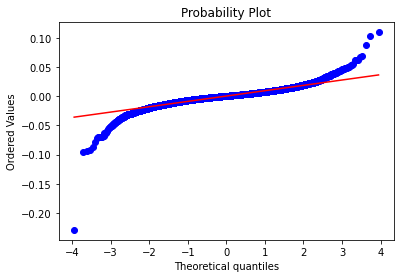

In [45]:
scipy.stats.probplot(logdiff, plot=matplotlib.pyplot)
# The default theoretical distribution is the
# standard normal distribution.

# Declaration of Independence #

It our returns were truly normally distributed, the normal probability plot would be a straight line.  But our plot shows again the our return data has fatter tails than a normal distribution, especially for negative returns.

For time being, let's make the **assumption** that our daily returns are **independent** and **identically distributed** (i.i.d.).  This gives us a simple ***statistical model*** for returns, from which we can try to infer information about the distribution of returns.

We'll test how accurate this i.i.d. assumption is later.

So if we model our daily returns $X_t$ as i.i.d. random variables, what can we say about the mean daily return $\mu = \mathbb{E}[X_t]$?

Our ***observed sample mean*** was 0.02958% per trading day (or 7.45% per annum), but this is only one particular realization of samples from our random variables $X_t$, and does **not** imply that the expected annual return actually is 7.45%.  It is likely somewhat different, but how different could it be?

When we say "*sample mean*" we might be referring to one of two distinct things:  (1) the ***observed*** sample mean from actual realized data, which is just a number, or the sample mean ***estimator***, which is a random variable.

In other words, if $x_1, x_2, \dots x_N$ is the ***observed*** time series data, then the observed sample mean is
$$\bar{x} = \frac{1}{N}\sum_{t=1}^N x_t.$$

On the other hand, if we ***model*** this time series as a sequence of i.i.d. random variables $X_1, X_2, \dots X_N$, the we can construct an ***estimator*** for the "***true***" mean $\mu$ as
$$\hat{\mu} = \frac{1}{N}\sum_{t=1}^N X_t,$$
which is a itself a ***random variable*** (and the $\hat{}$ is a common notation to denote an estimator of a true parameter).

Observe that
$$\mathbb{E}[\hat{\mu}] = \frac{1}{N}\sum_{t=1}^N \mathbb{E}[X_t] = \frac{1}{N}\sum_{t=1}^N \mu = \mu.$$
In other words, the expectation of our sample mean estimator $\hat{\mu}$ is the true mean $\mu$.  We call such an estimator ***unbiased***.

Similarly, we can compute the ***variance*** of our estimator $\hat{\mu}$.
\begin{align}
\operatorname{Var}(\hat{\mu}) &= \operatorname{Var}\left(\frac{1}{N}\sum_{t=1}^N X_t\right)\\
&= \operatorname{Cov}\left(\frac{1}{N}\sum_{s=1}^N X_s,\frac{1}{N}\sum_{t=1}^N X_t\right)\\
&= \frac{1}{N^2}\sum_{s=1}^N \sum_{t=1}^N \operatorname{Cov}(X_s, X_t)\\
&= \frac{1}{N^2}\sum_{t=1}^N \operatorname{Var}(X_t) \quad \text{(using our independence assumption)}\\
&= \frac{\sigma^2}{N},
\end{align}
where $\sigma^2 = \operatorname{Var}(X_t)$.

***Warning***:  This calculation requires our $X_t$ to be both ***independent*** and ***identically distributed***!

Therefore the standard deviation of the mean estimator $\hat{\mu}$, also called the ***standard error*** (SE) of the mean is
$$\operatorname{SE}(\hat{\mu}) = \sigma_{\hat{\mu}} = \frac{\sigma}{\sqrt{N}}.$$
So the larger our sample size, the more accurate will be our estimate of the true mean $\mu$.

However, we don't know what the true value of $\sigma$ is either!  But we can use the square root of the observed ***sample variance*** as a good approximation:
$$\sigma_{\hat{\mu}} \approx \frac{s}{\sqrt{N}},$$
where
$$s^2 = \frac{1}{N-1}\sum_{t=1}^N (x_t - \bar{x})^2.$$

Finally, by the ***Central Limit Theorem***, the distribution of the sample mean estimator $\hat{\mu}$ approaches a ***normal distribution*** as $N$ gets large, even if the distribution of the $X_t$ is not normal.

In [46]:
# What is our approximate standard error for our
# sample mean of daily returns?
SE = logdiff.std() / logdiff.count()**0.5
print(SE)

7.290772178103872e-05


So what does the mean for us?  Let's suppose that our ***true*** mean return is 5% per annum, or 0.01984% per day.  What is the approximate probabilty that a particular sample equals or exceeds our observed sample mean of 7.45% per annum (0.02958% per day)?

\begin{align}
\operatorname{Pr}(\hat{\mu} > 0.02958\%) &= \operatorname{Pr}\left(\frac{\hat{\mu} - 0.01984\%}{\operatorname{SE}} > \frac{0.02958\% - 0.01984\%}{\operatorname{SE}}\right)\\
&\approx\operatorname{Pr}\left(Z > \frac{0.00974\%}{0.00729\%}\right) \quad \text{where } Z \text{ is a standard normal random variable}\\
&\approx\operatorname{Pr}(Z > 1.336)\\
&= 1 - \Phi(1.336) \quad \text{where } \Phi \text{ is the cumulative distribution funcyion of the standard normal}\\
&\approx 9.08\%.
\end{align}

In [47]:
# Here is the code for the above calculation.
1 - scipy.stats.norm.cdf( (logdiff.mean() - 0.05/252) / SE )

0.09077923502705743

# I'm losing confidence.

In other words, ***if*** the true mean return were 5% per annum, there is an approximately 9% probability that we could have observed at least a 7.45% return.

Given a true mean $\mu$, what is the probabilty that an interval $(\hat{\mu}-c, \hat{\mu}+c)$ contains the true mean $\mu$?

\begin{align}
\operatorname{Prob}(\hat{\mu}-c < \mu < \hat{\mu}+c) &= \operatorname{Prob}(\mu -c < \hat{\mu} < \mu+c)\\
&= \operatorname{Prob}(-c < \hat{\mu} - \mu < c)\\
&= \operatorname{Prob}\left(-\frac{c}{\operatorname{SE}} < \frac{\hat{\mu} - \mu}{\operatorname{SE}} < \frac{c}{\operatorname{SE}}\right)\\
&\approx \operatorname{Prob}\left(-\frac{c}{\operatorname{SE}} < Z < \frac{c}{\operatorname{SE}}\right)\\
&= \Phi\left(\frac{c}{\operatorname{SE}}\right) - \Phi\left(-\frac{c}{\operatorname{SE}}\right).
\end{align}

If we would desire that probability to be 95%, then we would want
$$\frac{c}{\operatorname{SE}} \approx 1.96,$$
or
$$c \approx 1.96 \cdot \operatorname{SE} \approx 1.96 \frac{s}{\sqrt{N}}.$$

The interval
$$\left(\hat{\mu}-1.96\frac{s}{\sqrt{N}}, \hat{\mu}+1.96\frac{s}{\sqrt{N}}\right)$$
is called the ***95% confidence interval*** of the sample mean.

In [48]:
# Let's calculate our 95% confidence interval
# for daily returns.
(logdiff.mean() - 1.96*SE,logdiff.mean()+1.96*SE)

(0.00015291622864704028, 0.00043871449802871206)

In [49]:
# Let's annualize this.
(logdiff.mean() - 1.96*SE)*252,(logdiff.mean()+1.96*SE)*252

(0.03853488961905415, 0.11055605350323544)

In other words, if we take some sample of our size (17,532) of daily returns and calculated an average annual return, and we consider an interval of +/- 3.6% around our average, then we are 95% likely that the true mean is within that interval.

The particular sample that we observed historically gives an interval of (3.85%,11.05%).

We might roughly say that "*It is 95% likely that the interval (3.85%,11.05%) contains the true mean.*"

A range of 3.85% to 11.05% is very wide!  If you took $\$100$ and got a 3.85% return (continuously compounded), after 50 years you would have
$$\$100 \times e^{rt} = \$100 \times \exp{(0.0385 \times 50)} = \$685.51.$$

But if you took $\$100$ and got an 11.05% return, after 50 years you would have
$$\$100 \times e^{rt} = \$100 \times \exp{(0.1105 \times 50)} = \$25,088.63.$$

What a dramatic difference!

In general, mean returns are almost impossible to estimate with any degree of accuracy, a phenomenon called ***mean blur***.  It is one of the greatest problems in finance.

# It depends.

In the above calcuation of the standard error of our mean estimate, we assumed that the daily returns were independent of each other.  How accurate is that assumption?  One common test is to check whether daily returns are ***correlated*** with their ***lagged*** values.

In other words, we would like to know the ***covariance*** of $X_t$ with $X_{t-k}$, denoted $\gamma(t-k,t)$,
$$\gamma(t-k,t) = \operatorname{Cov}(X_{t-k}, X_t),$$
called the ***lag $k$ autocovariance***, as well as the ***lag $k$ autocorrelation*** (or ***serial correlation***), denoted $\rho(t-k,t)$,
$$\rho(t-k,t) = \frac{\operatorname{Cov}(X_{t-k},X_t)}{\sqrt{\operatorname{Var}(X_{t-k}) \operatorname{Var}(X_t) }}.$$

To calculate the lag $k$ sample autocovariance $r(k)$ of an observed time series $(x_1,x_2, \dots,x_N)$, ***pandas*** ```autocorr``` function calculates the sample correlation of the pairs $(x_1, x_{k+1}), (x_2, x_{k+2}), \dots, ..., (x_{N-k},x_N)$ as
$$r(k) = \frac{\sum_{t=1}^{N-k} (x_t - \bar{x}_{(1)})(x_{t+k} - \bar{x}_{(1+k)})}{\sqrt{\sum_{t=1}^{N-k} (x_t - \bar{x}_{(1)})^2 \sum_{t=1}^{N-k} (x_{t+k} - \bar{x}_{(1+k)})^2}}$$
where
$$\bar{x}_{(1)} = \frac{1}{N-k} \sum_{t=1}^{N-k} x_t$$
and
$$\bar{x}_{(1+k)} = \frac{1}{N-k} \sum_{t=1}^{N-k} x_{t+k}.$$

In [50]:
# Let's compute the autocorrelation coefficients
# from lag 0 to lag 5.
[logdiff.autocorr(k) for k in range(1,6)]
# k in range(1,6) means 1 <= k < 6 but not k = 6.

[0.025457812674860362,
 -0.04155168711997995,
 0.002466854245196088,
 -0.007357928342559309,
 -0.01451344517618303]

How should we interpret these autocorrelation coefficients?  They are quite close to zero, but we have a large number of observations, so do they have statistical significance?  Or could they be the result of random chance?

Given random variables $X_1, X_2, \dots, X_N$ , let
$$\hat{\rho}(k) = \frac{\sum_{t=1}^{N-k} (X_t - \bar{X}_{(1)})(X_{t+k} - \bar{X}_{(1+k)})}{\sqrt{\sum_{t=1}^{N-k} (X_t - \bar{X}_{(1)})^2 \sum_{t=1}^{N-k} (X_{t+k} - \bar{X}_{(1+k)})^2}}$$
where
$$\bar{X}_{(1)} = \frac{1}{N-k} \sum_{t=1}^{N-k} X_t$$
and
$$\bar{X}_{(1+k)} = \frac{1}{N-k} \sum_{t=1}^{N-k} X_{t+k}.$$

Then $\hat{\rho}(k)$ is a random variable which we can use to estimate the true autocorrelation $\rho(k)$.  Although the estimator is ***biased***, it can be shown that
$$\mathbb{E}[\hat{\rho}(k)] \to \rho(k)$$
as $N \to 0$, i.e. the sample autocorrelation estimator $\hat{\rho}(k)$ is ***asymptotically unbiased***.

Now suppose that the random variables $X_1, X_2, \dots, X_N$ are ***i.i.d.***  Then it can be shown that
$$\mathbb{E}[\hat{\rho}(k)] \approx - \frac{1}{N},$$
$$\operatorname{Var}(\hat{\rho}(k)) \approx \frac{1}{N},$$
and also that $\hat{\rho}(k)$ ***asymptotically normally distributed*** (see pg. 78 of text).  Therefore the sample autocorrelation coefficients of an i.i.d. time series has an approximate ***95% confidence limits*** of
$$\frac{-1}{N} \pm \frac{1.96}{\sqrt{N}} \approx \pm \frac{1.96}{\sqrt{N}}.$$

For our time series of returns, $N = 17532$, and $1/\sqrt{N} \approx 0.0076$, so our approximate 95% confidence interval is $(-0.0076, 0.0076)$.  So our lag 1, lag 2 and lag 5 autocorrelation coefficients seem to be ***statistically significant***, but are so small that is is not clear if they have any ***practical significance***.

In any event, modeling the times series as a purely random process of i.i.d. random variables still seems to be a reasonable initial approximation, but later we will consider how to incorporate autocorrelated random variables into our time series models.

# The more things change, the more they remain the same.

In the prior section, we examined whether the daily returns were independent of each other.  Now let's consider whether the returns are indeed identically distributed.  It is a reasonable and important question:  Have the properties of the S&P 500 returns (such as their mean and variance) changed over over the past 70 years?  And if they have changed, can our tools detect the change?

Given the rather wide 95% confidence interval of our annual return estimate of 3.85% to 11.05%, it is hard to be optmistic that we can detect ***any*** changes in mean returns.  We are just too ignorant.

In [49]:
firsthalf = logdiff.head(logdiff.count() // 2)
secondhalf = logdiff.tail(logdiff.count() // 2)

In [50]:
firsthalf.mean() * 252

0.06601165715659878

In [51]:
secondhalf.mean() * 252

0.08307928596569081

Although the average annual return of the most recent 35 years has been about 1.7% higher than the prior 35 years, this difference is ***not*** statistially signficant.  In our i.i.d. model of returns, such a difference could easily be the result of random fluctuation.  (Strictly speaking, the more proper way to test a null hypothesis that two sample means are unequal is with a **two sample hypothesis test**.)

What about the ***volatilty***, i.e. the annual standard deviation, of returns?

In [52]:
firsthalf.std() * 252**0.5

0.12348220570637779

In [53]:
secondhalf.std() * 252**0.5

0.17810952169699065

The most recent 35 years volaltity has been about 5.5% higher than the prior 35 years.  Is that statistically significant?

If we assume our returns are ***normally*** distributed, we can use the following formula to estimate the standard error of the sample variance estimator $\hat{\sigma}^2$,

$$\operatorname{SE}(\hat{\sigma}^2) = \sqrt{\frac{2\sigma^4}{N-1}} \approx \sqrt{\frac{2s^4}{N-1}},$$
where $s^2$ is the observed sample variance.

We can then approximate the standard error of standard deviation $\hat{\sigma}$ by
$$\operatorname{SE}(\hat{\sigma}) \approx \frac{\operatorname{SE}(\hat{\sigma}^2)}{2s} \approx \frac{s}{\sqrt{2(N-1)}}.$$

(***Caution!***  Our distribution is not quite normal; it has a lot of kurtosis, and that can increase the standard error of our sample variance.  We need to go back and check this more carefully.)

In [54]:
# Here is the code for calculating our initial
# estimate of the standard error of volatility.
SE_std_daily = logdiff.std() / (2*(logdiff.count()-1))**0.5
SE_std_daily * 252**0.5 # to quote in annual terms 

0.0008184104880745575

A 0.08% standard error is much smaller than the difference in the observed volatilities 12.35% in the first half and 17.81% in the second half.  This tells us at least one of two things:  
(1) our estimate of standard error of sample variance for our distribution is too low, and that we need to make a correction for our kurtosis, or  
(2) the variance of our returns is not constant, so our returns are ***not*** i.i.d.

**Note** - If the distributions were indeed normally distributed, then the statistical test we should apply is an ***F-test***, but such a test is highly sensitive to the normality assumption, i.e. approximate normality is not good enough.
https://en.wikipedia.org/wiki/F-test_of_equality_of_variances

Let's consider the kurtosis correction first.  An exact formula for the standard error of sample variance, valid for any distribution with finite fourth central moment, is
$$\operatorname{SE}(\hat{\sigma}^2) = \sqrt{\frac{1}{N}\left(\mu_4 - \frac{N-3}{N-1} \sigma^4 \right)},$$
where $\mu_4$ is the fourth central moment.  We can rewrite this in terms of the fourth standardized central moment $\tilde{\mu}_4$ as
$$\operatorname{SE}(\hat{\sigma}^2) = \sigma^2 \sqrt{\frac{1}{N}\left(\tilde{\mu}_4 - \frac{N-3}{N-1}\right)}.$$
Using our sample excess kurtosis $g_2$ to estimate excess kurtosis $\tilde{\mu}_4 - 3$, we have the approximation
$$\operatorname{SE}(\hat{\sigma}^2) \approx s^2 \sqrt{\frac{1}{N}\left(g_2 + 3 - \frac{N-3}{N-1}\right)} = s^2 \sqrt{\frac{g_2}{N} + \frac{2}{N-1}}.$$

We can then approximate the standard error of standard deviation $\hat{\sigma}$ by
$$\operatorname{SE}(\hat{\sigma}) \approx \frac{\operatorname{SE}(\hat{\sigma}^2)}{2s} \approx \frac{s}{2} \sqrt{\frac{g_2}{N} + \frac{2}{N-1}}.$$

In [55]:
# Let's incorporate kurtosis into our estimate of
# the standard error of volatility.
SE_std_daily = logdiff.std() / 2 * (logdiff.kurtosis()/logdiff.count() + 2/(logdiff.count()-1))**0.5
SE_std_daily * 252**0.5  # to quote in annual terms

0.0031024775798103735

The standard error of 0.31% for annual volatility is probably much more reasonable than hte previous 0.08%, which seems too small.  But even 0.31% is much smaller than the difference in our observed volatilities of 12.35% and 17.81% in the first and second halves of our time series.  So we can be quite confident that our returns do ***not*** have constant variance, so our returns are ***not i.i.d.***  (Note - A more rigorous way to test the equality of two variances from two nonnormal samples is with a test such as the ***Brown-Forsythe test***  https://en.wikipedia.org/wiki/Brown–Forsythe_test).

Actually we could already see this visually by examining the plot of the daily returns.

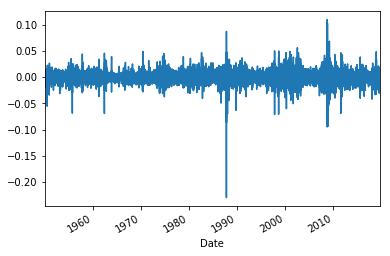

In [56]:
logdiff.plot()

We see that volatility "clusters", i.e. large (positive or negative) returns seem to be followed by more large returns, and small returns seem to be followed by more small returns, i.e. there are "noisy" and "quiet" periods.